In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import models,layers

In [3]:
import matplotlib.pyplot as plt

In [4]:
(test_images, test_labels) , (train_images,train_labels) = tf.keras.datasets.mnist.load_data()

In [5]:
test_images , train_images = test_images/255.0 , train_images/255.0

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3,3) , activation = "relu" , input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation = "relu"),
    layers.Flatten(),
    layers.Dense(64 , activation="relu"),
    layers.Dense(10, activation='softmax'),
])

In [7]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model.fit(train_images[...,tf.newaxis],train_labels, epochs=6, batch_size=100)

Epoch 1/6
100/100 [==============================] - 18s 148ms/step - loss: 0.7140 - accuracy: 0.7901
Epoch 2/6
100/100 [==============================] - 15s 146ms/step - loss: 0.1705 - accuracy: 0.9476
Epoch 3/6
100/100 [==============================] - 15s 145ms/step - loss: 0.1007 - accuracy: 0.9692
Epoch 4/6
100/100 [==============================] - 15s 146ms/step - loss: 0.0678 - accuracy: 0.9793
Epoch 5/6
100/100 [==============================] - 16s 156ms/step - loss: 0.0508 - accuracy: 0.9827
Epoch 6/6
100/100 [==============================] - 15s 152ms/step - loss: 0.0385 - accuracy: 0.9867


In [9]:
test_loss , test_accuracy = model.evaluate(test_images[...,tf.newaxis],test_labels,verbose=2)

1875/1875 - 30s - loss: 0.0931 - accuracy: 0.9709 - 30s/epoch - 16ms/step


In [10]:
print(test_accuracy)

0.9709333181381226


In [11]:
predictions = model.predict(test_images[...,tf.newaxis])

1875/1875 [==============================] - 38s 20ms/step


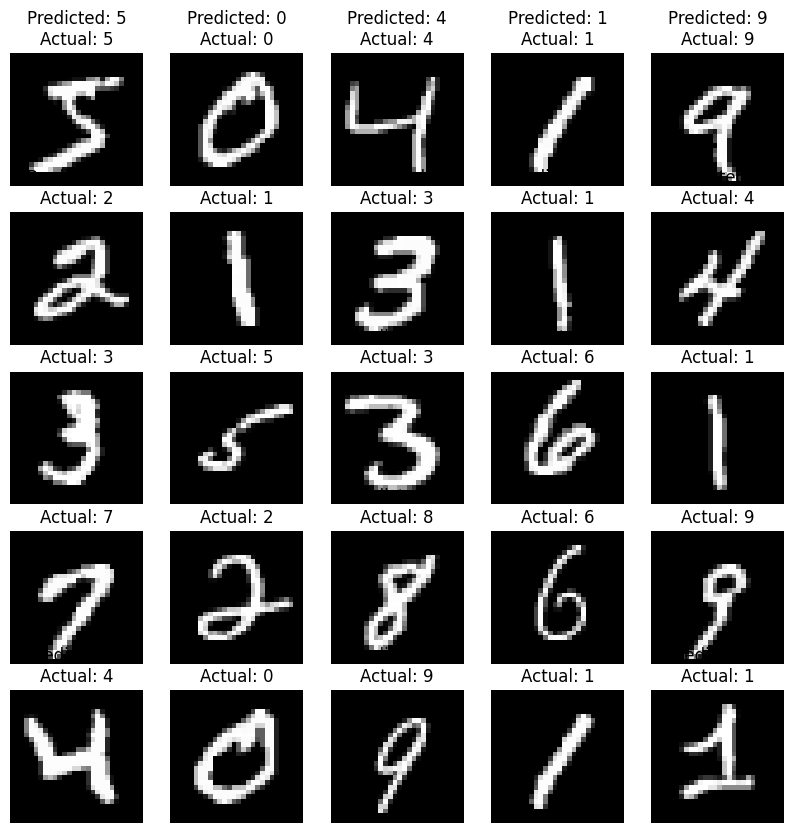

In [12]:
num_rows, num_cols = 5, 5
plt.figure(figsize=(10, 10))
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {tf.argmax(predictions[i])}\nActual: {test_labels[i]}")
    plt.axis('off')
plt.show()